First 5 rows of the dataset:
   step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64       170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2     1  TRANSFER    181.00          181.0            0.00             0.0   
3     1  CASH_OUT    181.00          181.0            0.00         21182.0   
4     1   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  
0             0.0      0.0             0.0  
1             0.0      0.0             0.0  
2             0.0      1.0             0.0  
3             0.0      1.0             0.0  
4             0.0      0.0             0.0  

Last 5 rows of the dataset:
        step      type     amount  oldbalanceOrg  newbalanceOrig  \
219760    14   PAYMENT     591.50      104879.68       104288.18   
219761    14   PAYMENT   14839.24      104288.18        89448.94   

<ipython-input-2-a77e5fce6053>:34: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


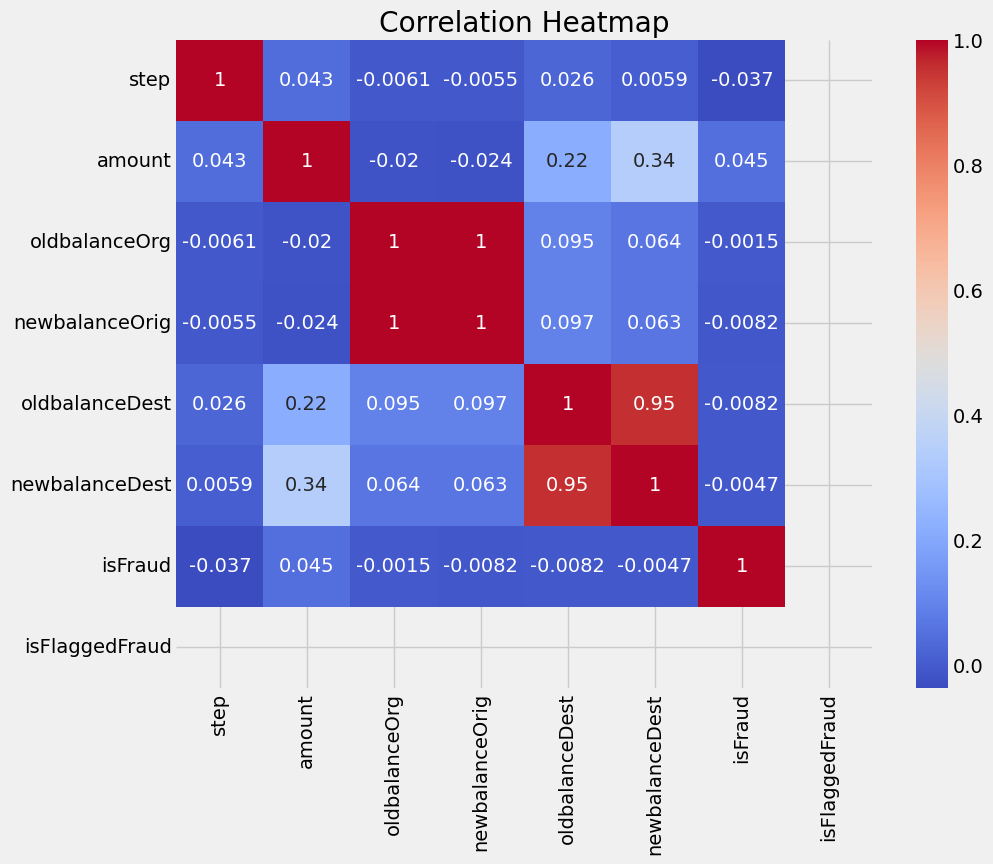

Null values in the dataset:
step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
type_encoded      0
dtype: int64


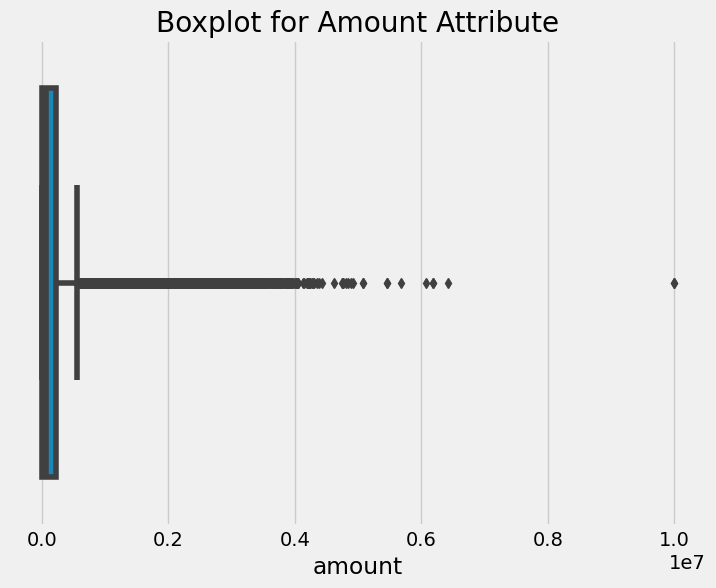

Random Forest Classifier Evaluation:
[[43926     1]
 [   11    15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43927
           2       0.94      0.58      0.71        26

    accuracy                           1.00     43953
   macro avg       0.97      0.79      0.86     43953
weighted avg       1.00      1.00      1.00     43953

Decision Tree Classifier Evaluation:
[[43913    14]
 [   10    16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43927
           2       0.53      0.62      0.57        26

    accuracy                           1.00     43953
   macro avg       0.77      0.81      0.79     43953
weighted avg       1.00      1.00      1.00     43953

Extra Trees Classifier Evaluation:
[[43926     1]
 [   16    10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43927
           2       0.91      0.38  

In [2]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Activity 1: Importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
plt.style.use('fivethirtyeight')

# Activity 2: Read the Dataset
file_path = '/content/PS_20174392719_1491204439457_log.csv'
data = pd.read_csv(file_path)

# Dropping unnecessary columns
data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)


# Displaying first five rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Displaying last five rows of the dataset
print("\nLast 5 rows of the dataset:")
print(data.tail())

# Correlation analysis using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Activity 3: Object Data Label Encoding
label_encoder = LabelEncoder()
data['type_encoded'] = label_encoder.fit_transform(data['type'])
data.drop('type', axis=1, inplace=True)

# Activity 4: Data Preprocessing

# Activity 4.1: Checking for Null Values
print("Null values in the dataset:")
print(data.isnull().sum())

# Activity 4.2: Handling Outliers (Example using Boxplot for 'amount')
plt.figure(figsize=(8, 6))
sns.boxplot(x='amount', data=data)
plt.title('Boxplot for Amount Attribute')
plt.show()

# Activity 4.3: Handling Missing Values (if present)
# Example: Filling missing values with mean
data.fillna(data.mean(), inplace=True)


# Activity 4.4: Scaling or Normalization (if required)
# Example using Min-Max Scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.drop('isFraud', axis=1))  # Scale features except target

# Convert scaled data back to DataFrame (if necessary)
data_scaled_df = pd.DataFrame(data_scaled, columns=data.drop('isFraud', axis=1).columns)
# Example: Creating a new feature 'balance_difference'
data_scaled_df['balance_difference'] = data_scaled_df['newbalanceDest'] - data_scaled_df['oldbalanceOrg']

# Update features and target after preprocessing steps
features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'type_encoded', 'balance_difference']
target = 'isFraud'


X = data_scaled_df[features]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['isFraud'])

# Splitting Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have X_train, X_test, y_train, y_test ready for further model building steps
# Activity 1: Random Forest Classifier
def RandomForest(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    predictions = rf.predict(X_test)

    # Evaluation
    print("Random Forest Classifier Evaluation:")
    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions))

    return rf

# Activity 2: Decision Tree Classifier
def DecisionTree(X_train, X_test, y_train, y_test):
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    predictions = dt.predict(X_test)

    # Evaluation
    print("Decision Tree Classifier Evaluation:")
    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions))

    return dt

# Activity 3: Extra Trees Classifier
def ExtraTree(X_train, X_test, y_train, y_test):
    et = ExtraTreesClassifier()
    et.fit(X_train, y_train)
    predictions = et.predict(X_test)

    # Evaluation
    print("Extra Trees Classifier Evaluation:")
    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions))

    return et

# Activity 4: Support Vector Machine Classifier
def SupportVector(X_train, X_test, y_train, y_test):
    svc = SVC()
    svc.fit(X_train, y_train)
    predictions = svc.predict(X_test)

    # Evaluation
    print("Support Vector Machine Classifier Evaluation:")
    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions))

    return svc

# Activity 5: XGBoost Classifier
def xgboost(X_train, X_test, y_train, y_test):
    xg =XGBClassifier()
    xg.fit(X_train, y_train)
    predictions = xg.predict(X_test)

    # Evaluation
    print("XGBoost Classifier Evaluation:")
    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions))

    return xg
# Activity 6: Compare the Models
def compareModels(models, X_train, X_test, y_train, y_test):
    for name, model in models.items():
        print(f"Evaluating {name}:")
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Evaluation
        print(confusion_matrix(y_test, predictions))
        print(classification_report(y_test, predictions))

# Activity 7: Evaluating performance of the model and saving the model
def saveModel(model, X, y, filename):
    model.fit(X, y)
    pickle.dump(model, open(filename, 'wb'))
# Assuming X_train, X_test, y_train, y_test are available after preprocessing
rf_model = RandomForest(X_train, X_test, y_train, y_test)
dt_model = DecisionTree(X_train, X_test, y_train, y_test)
et_model = ExtraTree(X_train, X_test, y_train, y_test)
svc_model = SupportVector(X_train, X_test, y_train, y_test)
xg_model = xgboost(X_train, X_test, y_train, y_test)
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier()
}

compareModels(models, X_train, X_test, y_train, y_test)

# Save the best performing model
best_model = SVC()  # Assuming SVC performed the best
saveModel(best_model, X, y, "/content/best_model2.pkl")